# Image processing and Principal Component Analysis

https://www.youtube.com/watch?v=hOKa8klJPyo
https://github.com/maartenbreddels/talk-ipyvolume-scipy2018/blob/master/ipyvolume-presentation.ipynb
https://ipyvolume.readthedocs.io/en/latest/

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import sklearn

from pandas import Series
from pandas import DataFrame
from typing import Tuple

from tqdm import tnrange#, tqdm_notebook
from plotnine import *

from sklearn.decomposition import PCA

# Local imports
from common import *
from convenience import *

## I. Image sampling and processing functions

### Luminocity based grayscale conversion

In [3]:
def convert_to_grayscale(image: np.array)-> np.array:
    """Converts RGB image to grayscale image preserving perceived luminocity""" 
    return 0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]

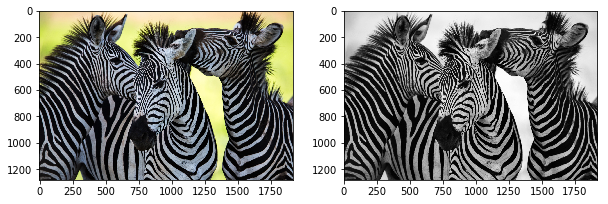

In [4]:
image = plt.imread('data/zebras.png')

#image = image[:512,:512, :]
gimage = convert_to_grayscale(image)


fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(gimage, cmap ='gray')

## II. Crash course to sklearn.decomposition.PCA

To apply PCA you must first define a PCA transformation object and then apply `fit` function. Only after that you can read out the main outcomes. 

In [28]:
X = DataFrame(np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]), columns=['x1', 'x2'])
display(X)
pca = PCA(n_components=2)
pca.fit(X)
None

,x1,x2
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,2,1
5,3,2


The main outcomes of PCA analysis are 
* shift vector
* rotation matrix
* eigenvalues and its interpretations 

In [33]:
W = DataFrame(pca.components_, columns = ['x1', 'x2'], index = ['PCA1', 'PCA2'])
Lambda = DataFrame(pca.explained_variance_, columns=['lambda'], index = ['PCA1', 'PCA2'])
cum_var = DataFrame(pca.explained_variance_, columns = ['variance'], index = ['PCA1', 'PCA2'])
rel_cum_var = DataFrame(100*pca.explained_variance_ratio_, columns = ['variance'], index = ['PCA1', 'PCA2'])
mu = DataFrame(pca.mean_, index = ['x1', 'x2']).T
mdisplay([Lambda.reset_index(),W.reset_index(), mu, cum_var.reset_index(), rel_cum_var.reset_index(), ], 
         ['Loadings', 'Rotation matrix', 'Center of gravity', 'Explained absolute variance', 'Explained relative variance'])

Loadings Rotation matrix Center of gravity Explained absolute variance Explained relative variance 
 
 
 index 
 lambda 
 
 
 
 
 PCA1 
 7.939543 
 
 
 PCA2 
 0.060457 
 
 
 
 
 
 index 
 x1 
 x2 
 
 
 
 
 PCA1 
 -0.838492 
 -0.544914 
 
 
 PCA2 
 0.544914 
 -0.838492 
 
 
 
 
 
 x1 
 x2 
 
 
 
 
 0.0 
 0.0 
 
 
 
 
 
 index 
 variance 
 
 
 
 
 PCA1 
 7.939543 
 
 
 PCA2 
 0.060457 
 
 
 
 
 
 index 
 variance 
 
 
 
 
 PCA1 
 99.244289 
 
 
 PCA2 
 0.755711

Secondly you can also do PCA transformation with centering and its reverse

In [44]:
mdisplay([
    X,
    DataFrame(pca.transform(X), columns = [r'$\xi_1$', r'$\xi_2$']),
    DataFrame(pca.inverse_transform(pca.transform(X)), columns = ['x1', 'x2'])], 
    ['Original data','PCA transformation', 'PCA + PCA$^{-1}$'])
mdisplay([DataFrame(pca.inverse_transform(DataFrame([[0, 0]], columns =['xi1', 'xi2'])), columns = ['x1', 'x2'])], ['Reverse of zero'])

Original data PCA transformation PCA + PCA$^{-1}$ 
 
 
 x1 
 x2 
 
 
 
 
 -1 
 -1 
 
 
 -2 
 -1 
 
 
 -3 
 -2 
 
 
 1 
 1 
 
 
 2 
 1 
 
 
 3 
 2 
 
 
 
 
 
 $\xi_1$ 
 $\xi_2$ 
 
 
 
 
 1.383406 
 0.293579 
 
 
 2.221898 
 -0.251335 
 
 
 3.605304 
 0.042244 
 
 
 -1.383406 
 -0.293579 
 
 
 -2.221898 
 0.251335 
 
 
 -3.605304 
 -0.042244 
 
 
 
 
 
 x1 
 x2 
 
 
 
 
 -1.0 
 -1.0 
 
 
 -2.0 
 -1.0 
 
 
 -3.0 
 -2.0 
 
 
 1.0 
 1.0 
 
 
 2.0 
 1.0 
 
 
 3.0 
 2.0

Reverse of zero 
 
 
 x1 
 x2 
 
 
 
 
 0.0 
 0.0

### II. PCA and colorspace compression

Let us first flatten image into sequence of RGB values and visualise it in the standard CIE 1931 colorspace.

In [11]:
colorspace = DataFrame({'R':image[:,:,0].flatten(),'B':image[:,:, 1].flatten(),'G':image[:,:, 2].flatten()})
head(colorspace)

,R,B,G
0,0.721569,0.694118,0.427451
1,0.721569,0.694118,0.427451
2,0.721569,0.694118,0.419608
3,0.721569,0.694118,0.419608
4,0.721569,0.694118,0.419608


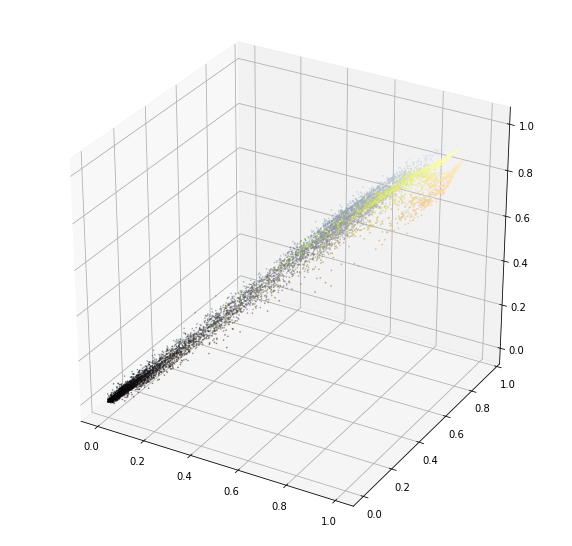

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect(1)
ax.scatter(df.loc[:, 'R'], df.loc[:, 'G'], df.loc[:, 'B'], c = df.values, s = 0.5)

In [33]:
pink_image = plt.imread('data/colorspace/picasso_nude_with_crossed legs_1903.png')
blue_image = plt.imread('data/colorspace/picasso_woman_with_a_helmet_of_hair_1904.png')




In [35]:
def colorspace(image) -> DataFrame:
    return DataFrame({'R':image[:,:,0].flatten(),'B':image[:,:, 1].flatten(),'G':image[:,:, 2].flatten()})

In [36]:
df_pink = colorspace(pink_image)
df_blue = colorspace(blue_image)


In [37]:
df = df_pink.sample(n = 10000)
fig = ipv.figure()
scatter = ipv.scatter(df.loc[:, 'R'].values, df.loc[:, 'G'].values, df.loc[:, 'B'].values, color = df.values, s = 0.5, marker='sphere')
ipv.show()

In [38]:
df = df_blue.sample(n = 10000)
fig = ipv.figure()
scatter = ipv.scatter(df.loc[:, 'R'].values, df.loc[:, 'G'].values, df.loc[:, 'B'].values, color = df.values, s = 0.5, marker='sphere')
ipv.show()

In [5]:
import ipyvolume as ipv

In [31]:
df = colorspace.sample(n = 10000)



In [32]:
fig = ipv.figure()
scatter = ipv.scatter(df.loc[:, 'R'].values, df.loc[:, 'G'].values, df.loc[:, 'B'].values, color = df.values, s = 0.5, marker='sphere')
ipv.show()

In [18]:
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))
x

array([-4.89669883e-01, -6.52595044e-01, -6.33681237e-02,  3.12785217e-01,
        3.66996821e-01,  8.84379171e-01, -4.56045665e-01,  6.50600202e-01,
       -3.11109293e+00, -2.30829280e+00,  1.06503259e+00,  7.74632297e-01,
       -5.69500576e-01,  7.04327679e-01,  1.37498557e-01,  1.73282383e+00,
       -1.38005219e+00, -2.01129457e-02, -1.79358898e+00,  1.27339670e+00,
        2.01767858e-01,  1.70833988e-01, -1.64670967e+00, -1.70622715e-01,
       -4.75555082e-01, -6.22502035e-01, -1.63487615e+00,  7.40757404e-01,
        1.68224927e+00,  4.38991040e-01,  4.14644088e-02,  8.99665974e-01,
        2.98775491e-02,  2.62006942e-01, -1.05953271e+00, -4.97530323e-01,
       -1.60850217e+00,  8.84952999e-01,  1.16620785e+00, -1.58040468e+00,
        1.40299747e+00, -5.06015591e-01,  1.21374761e+00, -5.09016016e-01,
        3.35179765e-02, -1.62239804e+00,  2.11402058e-01,  2.54801728e-01,
        1.68316065e-01,  3.58543749e-01, -2.25934814e-01,  3.17758304e+00,
        2.42741955e-01,  

In [8]:
fig = ipv.figure()
scatter = ipv.scatter(x, y, z, marker='sphere')
ipv.show()

In [6]:
x, y, z = np.random.random((3, 10000))
ipv.quickscatter(x, y, z, size=1, marker="sphere")

In [ ]:
ipv.quickscatter

In [28]:
scatter.geo = 'box'

In [29]:
ipv.save('example.html')

In [30]:
w = widgets.ToggleButtons(options=['sphere', 'box', 'diamond', 'circle_2d', 'point_2d', 'arrow'])
widgets.link((scatter, 'geo'), (w, 'value'))
w

ToggleButtons(index=1, options=('sphere', 'box', 'diamond', 'circle_2d', 'point_2d', 'arrow'), value='box')

In [23]:
import ipywidgets as widgets


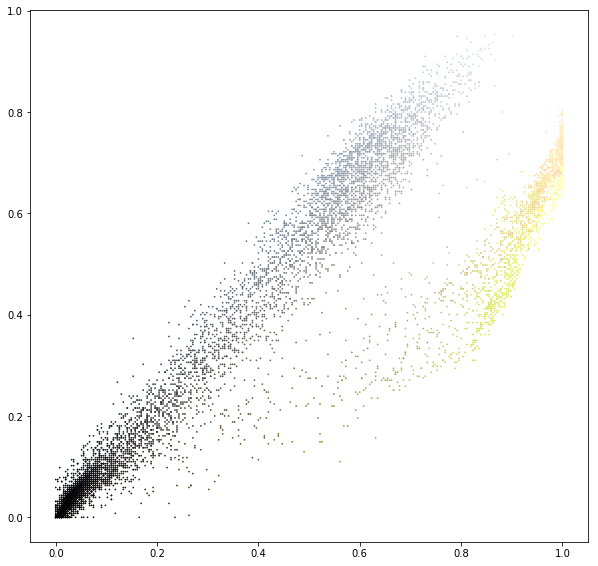

In [18]:
df = colorspace.sample(n = 10000)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.scatter(df.loc[:, 'R'], df.loc[:, 'G'], c = df.values, s = 0.5)

As you can see the main bulk of colors is nearly one-dimenional stretch of 

array([[0.72156864, 0.69411767, 0.42745098],
       [0.72156864, 0.69411767, 0.42745098]], dtype=float32)

ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 3, 'y' with size 3.

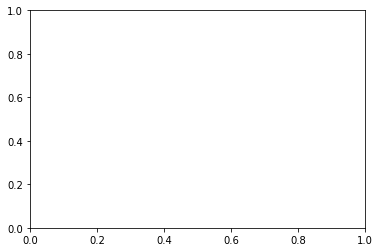

In [72]:
plt.scatter(colorspace.loc[:2, 'R'], colorspace.loc[:2, 'G'], 'o', c=[[0.72156864, 0.69411767, 0.42745098],
       [0.72156864, 0.69411767, 0.42745098]])

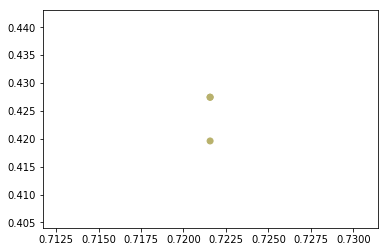

In [76]:
X = [0, 1, 2]
Y = [0, 1, 2]
Z = [0, 1, 2]
C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])
C1 = colorspace[:3].values
fig = plt.figure()
plt.scatter(colorspace.loc[:2, 'R'], colorspace.loc[:2, 'G'], c =colorspace.loc[:2].values)# C/255.0)
plt.show()

In [25]:
pca = PCA(n_components=3)
pca.fit(colorspace)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
W = DataFrame(pca.components_, columns = ['R', 'G', 'B'], index = ['PCA1', 'PCA2', 'PCA3'])
W

,R,G,B
PCA1,0.630674,0.594667,0.498619
PCA2,0.000428,-0.642777,0.766053
PCA3,0.776047,-0.482917,-0.405637


### III. PCA and texture compression

,x1,x2
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,2,1
5,3,2


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([6.30061232, 0.54980396])

,x1,x2
PCA1,-0.838492,-0.544914
PCA2,0.544914,-0.838492


In [ ]:

display(pca.components_)
